<a href="https://colab.research.google.com/github/mohmiim/MLIntroduction/blob/master/session-3/ImageConv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# https://github.com/mohmiim/MLIntroduction/raw/master/session-3/data/train/bar_chart/10.png

import os

!wget --no-check-certificate \
    https://github.com/mohmiim/MLIntroduction/raw/master/session-3/data/train/bar_chart/10.png \
    -O /tmp/10.png

IMAGE_PATH = "/tmp/10.png"


--2020-03-29 15:02:18--  https://github.com/mohmiim/MLIntroduction/raw/master/session-3/data/train/bar_chart/10.png
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mohmiim/MLIntroduction/master/session-3/data/train/bar_chart/10.png [following]
--2020-03-29 15:02:18--  https://raw.githubusercontent.com/mohmiim/MLIntroduction/master/session-3/data/train/bar_chart/10.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27151 (27K) [image/png]
Saving to: ‘/tmp/10.png’

/tmp/10.png         100%[===================>]  26.51K  --.-KB/s    in 0.01s   

2020-03-29 15:02:18 (2.17 MB/s) - ‘/tmp/10.png’ saved [27

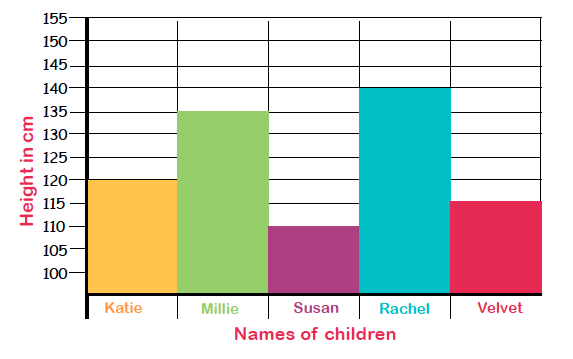

In [4]:
# load and show the image 
from PIL import Image
from IPython.display import display # to display images

# load the image
image = Image.open(IMAGE_PATH)
# convert the image to grayscale
gs_image = image.convert(mode='L')
display(image)

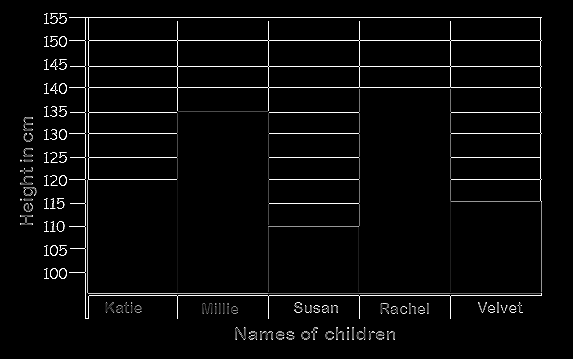

In [5]:
from PIL import ImageDraw
# image data
I = gs_image.load()
# filter
K = [[0, 1, 0],
     [1, -4, 1],
     [0, 1, 0]]
# output image
output_image = Image.new("L", gs_image.size)
draw = ImageDraw.Draw(output_image)

# convolution
for x in range(1, gs_image.width - 1):
    for y in range(1, gs_image.height - 1):
        newColor = 0
        for a in range(3):
            for b in range(3):
                xn = x + a - 1
                yn = y + b - 1
                newColor += I[xn,yn] * K[a][b]
        draw.point((x, y), newColor)
#display
display(output_image)